<br>
<div align='center'><img src="https://raw.githubusercontent.com/vporubsky/CaGraph/main/figures/icon.png" width="100%" style="padding: 20px">
</div>

# Generating and analyzing functional graphs of calcium imaging data

Developer: Veronica Porubsky <br>
Correspondence: verosky@uw.edu <br>
Example Data Provided by: Eric Zhang and Dr. Sean Piantadosi, Bruchas Lab, University of Washington<br>

This notebook implements a subset of the functionality provided by the Python package, cagraph. This package is designed to construct functional graphs using timeseries data of neurons recorded with calcium imaging. <br>

**Quick Links:**

Main tutorial using mock dataset: 


# Tutorial Outline
* [Installations and imports](#installations-imports)
* [Set path and filename](#path-filename)
* [Load and visualize raw calcium imaging data](#load-data)
* [Generate CaGraph object](#cagraph-object)
* [Analyze graph topology](#analyze-graph)
* [Visualize static graph](#visualize-static-graph)
* [Visualize interactive graph](#visualize-interactive-graph)
* [Plotting matched samples](#plotting-matched-samples)
* [Preprocessing and parameter selection](#preprocessing)


# Installations and imports  <a class="anchor" id="installations-imports"></a>

In [1]:
# !pip install -r requirements # uncomment to install package requirements

In [2]:
# Import cagraph functionality
from cagraph import CaGraph
import visualization as viz
import preprocess as prep

# Additional useful imports and display setup
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 150)
import os

# Set path and filename  <a class="anchor" id="path-filename"></a>

In [3]:
# Set path to datasets for example analysis
DATA_PATH = os.getcwd() + '/datasets/'

# Select file to use as dataset to generate graph examples
FILENAME = 'dg_dataset.csv'


# Load and visualize raw calcium imaging data  <a class="anchor" id="load-data"></a>

In [4]:
# Generate graph object from numpy.ndarray
data = np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')
print(f"This dataset contains {data.shape[0] - 1} neurons and {data.shape[1]} timepoints.")

# Visualize raw data using pandas.DataFrame
df = pd.DataFrame(data)
build_index = ['time']
for i in range(data.shape[0] - 1):
    build_index.append('neuron ' + str(i))
df.index = build_index
display(df)

This dataset contains 122 neurons and 3600 timepoints.


,0,1,2,3,4,...,3595,3596,3597,3598,3599
time,0.100000,0.200000,0.30000,0.400000,0.50000,...,3.596000e+02,3.597000e+02,3.598000e+02,3.599000e+02,3.600000e+02
neuron 0,0.285750,0.262420,0.24099,0.221320,0.20325,...,6.906700e-50,6.342800e-50,5.825000e-50,5.349400e-50,4.912600e-50
neuron 1,0.446380,0.404920,0.36731,0.333190,0.30225,...,4.665400e+00,4.232100e+00,3.839000e+00,3.482400e+00,3.158900e+00
neuron 2,4.724500,4.098900,3.55620,3.085300,2.67680,...,2.710500e-22,2.351600e-22,2.040200e-22,1.770100e-22,1.535700e-22
neuron 3,0.037735,0.033251,0.02930,0.025818,0.02275,...,3.705800e-04,3.265400e-04,2.877400e-04,2.535400e-04,2.234200e-04
...,...,...,...,...,...,...,...,...,...,...,...
neuron 117,0.000000,0.000000,0.00000,0.000000,0.00000,...,1.653200e-02,1.370900e-02,1.136800e-02,9.427300e-03,7.817600e-03
neuron 118,0.000000,0.000000,0.00000,0.000000,0.00000,...,6.452500e-07,5.611700e-07,4.880400e-07,4.244400e-07,3.691300e-07
neuron 119,0.232050,0.188370,0.15292,0.124130,0.10077,...,2.642700e-06,2.145300e-06,1.741500e-06,1.413700e-06,1.147600e-06
neuron 120,0.351260,0.325990,0.30254,0.280780,0.26058,...,3.047700e-111,2.828500e-111,2.625000e-111,2.436200e-111,2.261000e-111


# Generate CaGraph object <a class="anchor" id="cagraph-object"></a>

In [5]:
# Set hyperparameters
THRESHOLD = 0.3

# Generate graph object, called "cg" from CSV file 
cg = CaGraph(DATA_PATH + FILENAME, dataset_id = '1055-1', threshold=THRESHOLD) 
cg_graph = cg.get_network_graph() # Construct a graph

# Dataset information using CaGraph object
print(f"The dataset contains {cg.num_neurons} neurons and has a time interval of {cg.dt} sec")
print(f"Subject is {cg.data_id}")

The dataset contains 122 neurons and has a time interval of 0.1 sec
Subject is 1055-1


# Analyze graph topology <a class="anchor" id="analyze-graph"></a>

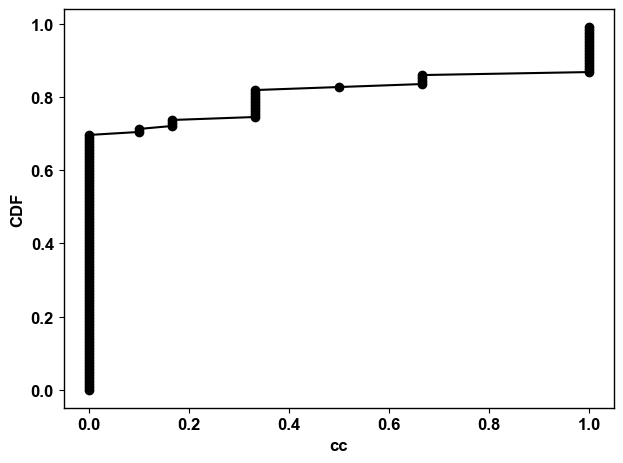

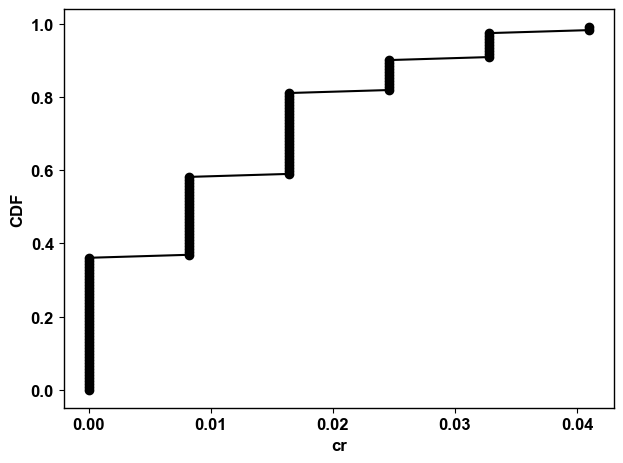

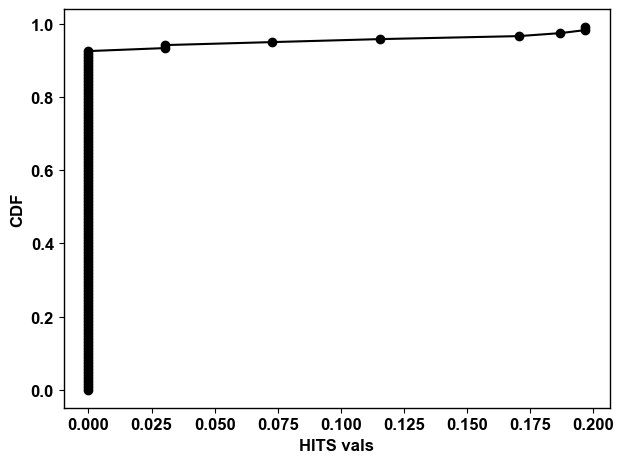

In [6]:
# Analyze graph topology
# Compute the clustering coefficient for all nodes
import matplotlib.pyplot as plt
plt.figure()
cg_cc = cg.get_clustering_coefficient()
viz.plot_CDF(data=cg_cc, x_label='cc')

# Compute the correlated pairs ratio for all nodes
plt.figure()
cg_cr = cg.get_correlated_pair_ratio()
viz.plot_CDF(data=cg_cr, x_label='cr')

# Compute the hubs in the graph
plt.figure()
cg_hubs, cg_hits = cg.get_hubs()
viz.plot_CDF(data=list(cg_hits.values()), x_label='HITS vals')

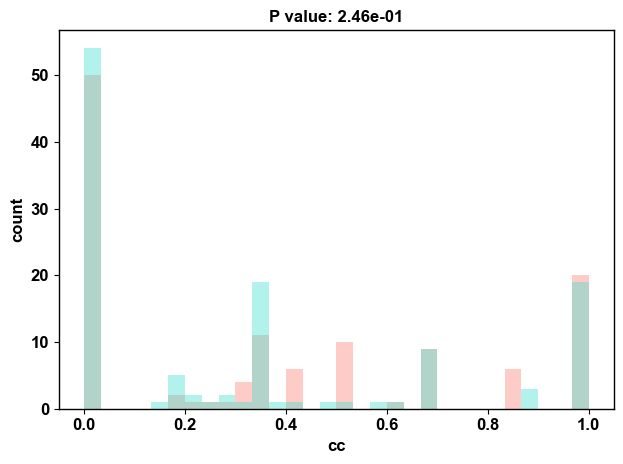

TypeError: plot_CDF_compare_two_samples() got an unexpected keyword argument 'labels'

In [13]:
# Plotting CDF to compare two conditions
# Convert CSV to numpy.ndarry and index separate conditions
# Context A: second half of data
cg_A = CaGraph(np.genfromtxt(DATA_PATH + FILENAME, delimiter=',')[:,1800:3600], threshold=THRESHOLD)
cg_A_cc = cg_A.get_clustering_coefficient()

# Context B: first half of data
cg_B = CaGraph(np.genfromtxt(DATA_PATH+ FILENAME, delimiter=',')[:,0:1800], threshold=THRESHOLD)
cg_B_cc = cg_B.get_clustering_coefficient()

# Plot histogram of distributions
viz.plot_histograms(data_list=[cg_A_cc, cg_B_cc],
                                x_label='cc',
                                color_list=['salmon','turquoise'],
                                bin_size=30,
                                show_plot=True)

# Plot cumulative distribution function
viz.plot_CDF_compare_two_samples(data_list=[cg_A_cc, cg_B_cc],
                                             x_label='cc',
                                             color_list=['salmon', 'turquoise'],
                                             legend=['context A', 'context B'],
                                             show_plot=True)

# Visualize static graph <a class="anchor" id="visualize-static-graph"></a>

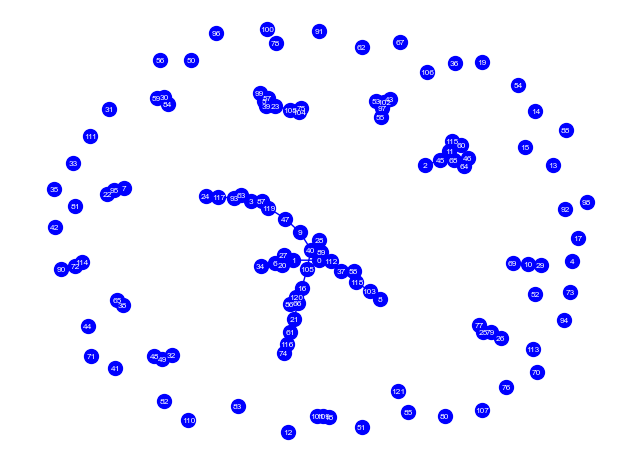

In [8]:
# Standard graph visualization with NetworkX
cg.plot_graph_network(graph=cg_graph) # Plot the graph (simplistic version)


# Visualize interactive graph <a class="anchor" id="visualize-interactive-graph"></a>

In [9]:
# Interactive plotting with Bokeh integration - generate interactive graph
viz.interactive_network(ca_graph_obj=cg,
                        adjust_size_by='degree',
                        adjust_color_by='communities',
                        show_in_notebook=True)


Loading BokehJS ...

In [10]:
# Change threshold and visuzalize graph
cg.threshold = 0.2
viz.interactive_network(ca_graph_obj=cg,
                        adjust_size_by='degree',
                        adjust_color_by='communities',
                        show_in_notebook=True)


Loading BokehJS ...

# Plotting matched samples <a class="anchor" id="plotting_matched_samples"></a>

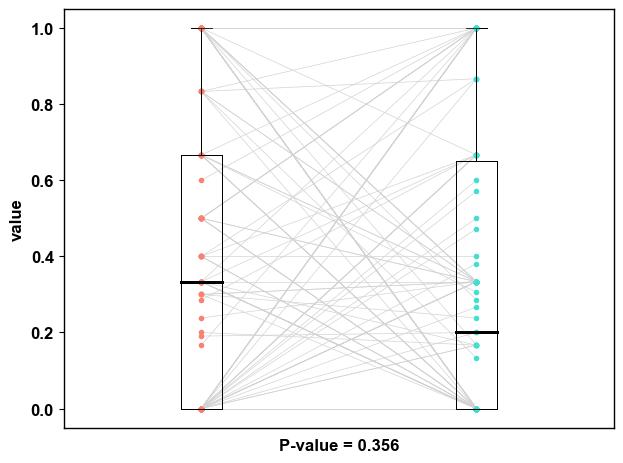

In [12]:
# Plotting matched samples
viz.plot_matched_data(sample_1=cg_A_cc,
                                  sample_2=cg_B_cc,
                                  labels=['A', 'B'],
                                  colors=['salmon','turquoise'],
                                  show_plot=True)

# Preprocessing and parameter selection <a class="anchor" id="preprocessing"></a>

In [12]:
# Generate shuffled dataset across individual neurons
data = np.genfromtxt(DATA_PATH + 'bla_dataset.csv', delimiter=',')

# event_data will contain a matrix with a time row and all neuron rows as in the data array
# each row, column index in the neuron rows will contain either 0 if no event was detected in that time period
# or 1 if an event was detected
event_data = np.genfromtxt(DATA_PATH + 'bla_events.csv', delimiter=',') # same size as data array

# Shuffle the data using identified events
shuffled_data = prep.generate_event_shuffle(data=data.copy(), event_data=event_data)

(40, 17987)


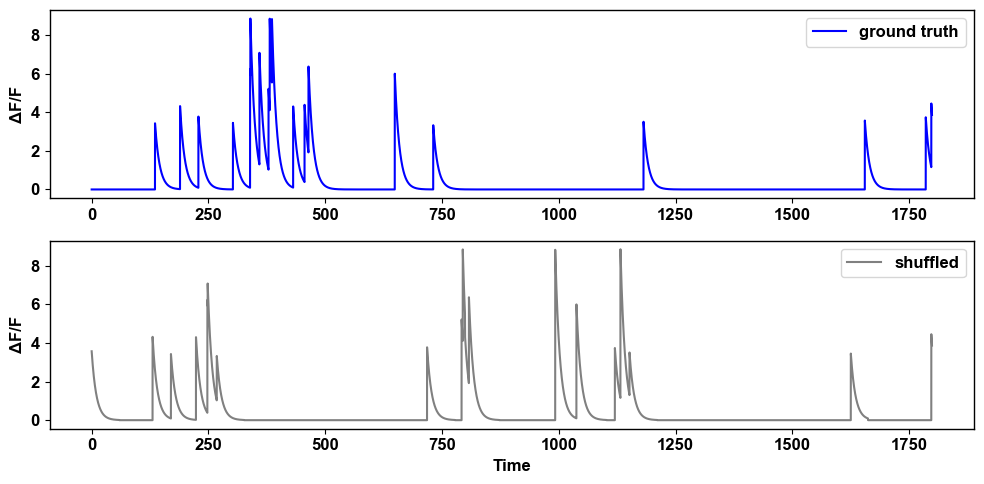

In [20]:
# Plot shuffled trace
prep.plot_shuffle_example(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)

KS-statistic: KstestResult(statistic=0.1051939513477975, pvalue=9.556089610824692e-08, statistic_location=0.07222170833417894, statistic_sign=1)
The threshold is: 0.14440978259573892


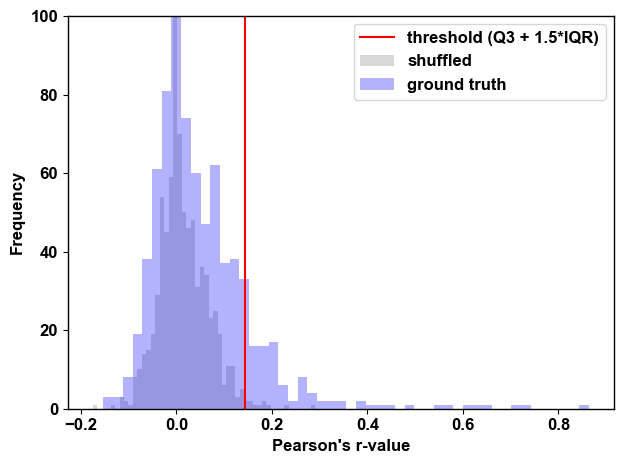

In [22]:
# Generate proposed threshold
THRESHOLD = prep.generate_threshold(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)

# Plot threshold
prep.plot_threshold(data=data.copy(), shuffled_data=shuffled_data, event_data=event_data)


In [31]:
# Generate graph using BLA dataset
bla_graph = CaGraph(data_file= DATA_PATH + 'bla_dataset.csv', threshold=THRESHOLD)

# Visualize graph
viz.interactive_network(ca_graph_obj=bla_graph,
                        adjust_size_by='degree',
                        adjust_color_by='communities',
                        show_in_notebook=True)

39


Loading BokehJS ...